# Table of Contents <a id='top'></a> 
                                                          

1. [Import Packages](#imports)<br>
2. [Define Functions](#functions)<br> 
3. [Conduct Experiments](#experiments)<br> 

---
## 1: Import Packages <a id='imports'></a> 
[jump to top](#top)<br>

In [1]:
# modules I created
from bidder import Bidder
from auction import Auction, User

# outside libraries
import pandas as pd

--- 
## 2: Define Functions <a id='functions'></a> 
[jump to top](#top)<br>

In [2]:
def run_experiment(auction):
    for i in range(auction.bidders[0].num_rounds):
        auction.execute_round()

In [3]:
def overview(auction):
    """Given a completed auction (an auction object for which .execute() has been repeatedly called),
    summarize the attributes of the bidders involved and indicate the final balance of each bidder"""
    
    dicty = {"bidder_id": [],
             "bidder_type": [],
             "alpha": [],
             "aggressiveness": [],
             "under_cut": [],
             "num_users": [],
             "final_balance": []}

    for bidder in auction.bidders:
        dicty["bidder_id"].append(bidder)
        dicty["bidder_type"].append(bidder.bidder_type)
        if bidder.bidder_type == "smart":
            dicty["alpha"].append(bidder.alpha)
            dicty["aggressiveness"].append(bidder.aggressiveness)
            dicty["under_cut"].append(bidder.under_cut)
        else:
            dicty["alpha"].append("NA")
            dicty["aggressiveness"].append("NA")
            dicty["under_cut"].append("NA")
        dicty["num_users"].append(len(auction.users))
        dicty["final_balance"].append(auction.balances[bidder])

    summary_df = pd.DataFrame(dicty)
    
    return summary_df

--- 
## 3: Conduct Experiments <a id='experiments'></a> 
[jump to top](#top)<br>

### Sample Experiment

In [7]:
users = [User() for i in range(10)]
bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero"),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.1, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.2, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="random")]

auction = Auction(users, bidders)

run_experiment(auction)

In [8]:
overview(auction)

,bidder_id,bidder_type,alpha,aggressiveness,under_cut,num_users,final_balance
0,<bidder.Bidder object at 0x10f669010>,zero,NA,NA,NA,10,0.000000
1,<bidder.Bidder object at 0x12c9a4810>,smart,0.1,0.85,0,10,122.750679
2,<bidder.Bidder object at 0x10fc13a90>,smart,0.2,0.85,0,10,3.463214
3,<bidder.Bidder object at 0x10fc12710>,random,NA,NA,NA,10,-6.169128


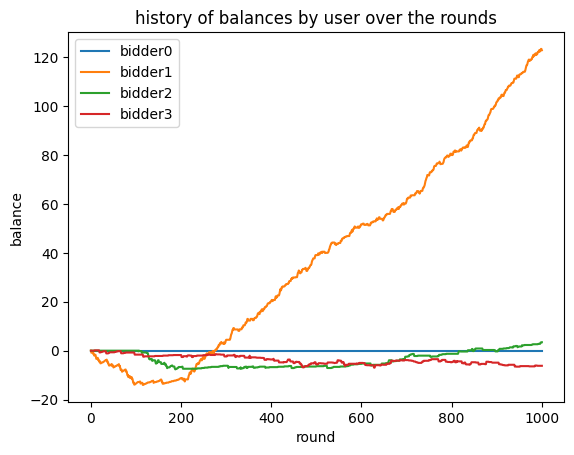

In [9]:
auction.plot_history()